<br>
<br>
<p style="font-size:30px;text-align:center;">Salaries Exploratory Data Analysis</p>
    
<p style="font-size:30px;text-align:center;">Manuela da Cruz Chadreque</p>

<p style="font-size:30px;text-align:center;">10 Dezember 2020 </p>
<br>
<br>

Welcome to a quick project to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! 

## Setup and Sourcing

### import needed libryries

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

### Loading the dataset

In [3]:
df= pd.read_csv('Salaries.csv')

## Cleaning

### Inspect the data 

In [4]:
# check the first rows
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Analysis:
* Notes, Benefits and Status column seams to have only null values;
* We might need to change the column names;
* We can drop the following columns: ID, EmployeeName, Status;

We continue our inspection to the data .info() method to find out how many valid entries per variable/column, this is important also to spot missing values

In [5]:
df.shape

(148654, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [7]:
# Print the value counts for 'Borough'
print(df['Agency'].unique())


['San Francisco']


Analysis:
* The data have 148654 rows and 13 columns
* Benefits,BasePay, OvertimePay and OtherPay  columns have missing values, we can drop Notes and Status since there are no valid observations in these columns;
* Notes and Status have no valid values, we can say that this field is never filled;
* Agency column only have one distinct values, we can drop this column;
* Year column have type int instead of cathegory;

### Fix Rows and Columns

#### Drop unecessary columns###


In [8]:
#Drop Notes and Status since these columns does not have information
df.drop(['Id','Notes', 'Status','Agency'], axis=1, inplace=True)
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

#### Rename columns

In [9]:
dic={'EmployeeName':'Employee', 'JobTitle':'Job'}
df.rename(columns=dic, inplace=True)
df.head()

,Employee,Job,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


#### Change datatype 

In [13]:
cat_type = CategoricalDtype(categories=[2011, 2012, 2013, 2014], ordered=True)
df['Year'] = df['Year'].astype(cat_type)
df['Year'].dtype

CategoricalDtype(categories=[2011, 2012, 2013, 2014], ordered=True)

### Fix Missing Values

#### Inspecting Missing Values

Employee                0
Job                     0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64
__________________ 
Employee             0.000000
Job                  0.000000
BasePay              0.409676
OvertimePay          0.002691
OtherPay             0.002691
Benefits            24.326961
TotalPay             0.000000
TotalPayBenefits     0.000000
Year                 0.000000
dtype: float64


<AxesSubplot:>

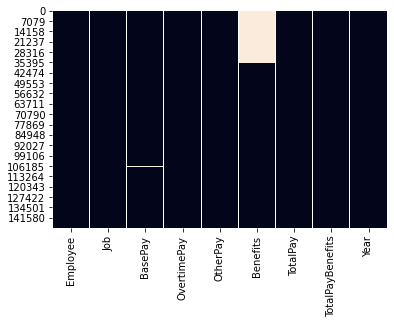

In [79]:
#Missing values per column
print(df.isnull().sum())
print('__________________ ')

print(df.isna().sum()/len(df)*100)
#Visualizing missing values
sns.heatmap(df.isnull(), cbar=False)

Analysis:
* BasePay have 609 missing values
* Benefits column have 24.3% of missing values

### Inspecting Duplicates

In [40]:
df.duplicated().sum()

0

## Respond To Questions

**What is the average Base Pay ?**

In [32]:
df['BasePay'].mean()

66325.44884050643

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64


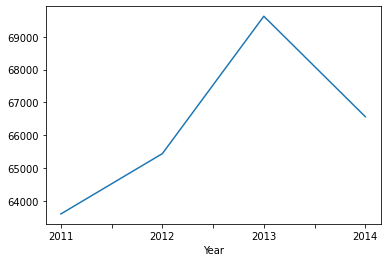

In [34]:
BasePayPerYear=df.groupby('Year').mean()['BasePay']
print(BasePayPerYear)

BasePayPerYear.plot(kind='line')
plt.show()

Analysis:
* The average base pay is around 66325;
* The average base pay is not constant across the years;
* In 2013 was observed the higest average base pay.
* In 2011 was observed the minimun average pay

**What is the highest amount of OvertimePay in the dataset ?**

In [23]:
df[df['OvertimePay']==df['OvertimePay'].max()]

,Employee,Job,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011


Analysis:
* GARY JIMENEZ have the highest OvertimePay with over $245131 

**What is the job title of  JOSEPH DRISCOLL ?**

Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).

In [103]:
df[df['Employee']=='JOSEPH DRISCOLL']['Job']

24    CAPTAIN, FIRE SUPPRESSION
Name: Job, dtype: object

**How much does JOSEPH DRISCOLL make (including benefits)?**

In [105]:
df[df['Employee']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [106]:
#sal.loc[sal['TotalPayBenefits'].argmax()]

df[df['TotalPayBenefits']==df['TotalPayBenefits'].max()]

,Employee,Job,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011


**What is the name of lowest paid person (including benefits)?**


In [110]:
df[df['TotalPayBenefits']==df['TotalPayBenefits'].min()]

,Employee,Job,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014


* Do you notice something strange about how much he or she is paid?

**How many unique job titles are there?**

In [45]:
sal['JobTitle'].nunique()

2159

**What are the top 5 most common jobs?**

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: Job, dtype: int64


<AxesSubplot:>

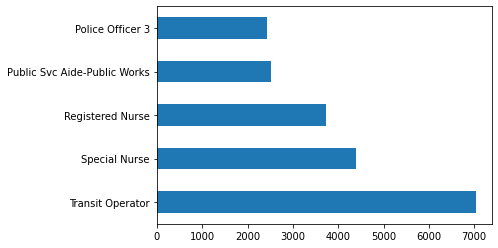

In [45]:
Top5=df['Job'].value_counts().head(5)

print(Top5)
Top5.plot(kind='barh')

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [47]:
sum(df[df['Year']==2013]['Job'].value_counts()==1)


202

**How many people have the word Chief in their job title?**

In [48]:
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

In [50]:
sum(df['Job'].apply(lambda x: chief_string(x)))

627

**Is there a correlation between length of the Job Title string and Salary?**

In [56]:
df['title_len'] = df['Job'].apply(len)

In [57]:
df[['title_len','TotalPayBenefits']].corr() 

,title_len,TotalPayBenefits
title_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


Analysis:
* There is no correlation.

In [58]:
df.head()

,Employee,Job,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,title_len
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,46
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,31
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,31
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,36
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,44


<AxesSubplot:>

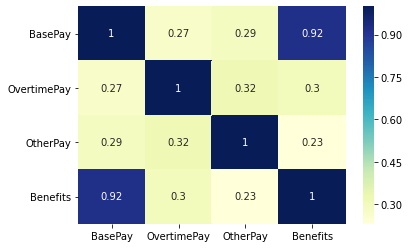

In [65]:
s=['BasePay','OvertimePay','OtherPay','Benefits']
sns.heatmap(np.round(df[s].corr(),2), annot=True,cmap="YlGnBu")

Analysis:
* Base Pay is highly correlated to Benefits;
* People who have higher BasePay tend to have higher benefits;
* Overtime Pay seems to not be correlated with the BasePay or otherPay